## Heart Disease Dataset Description

The Heart Disease Dataset contains a number of variables that can be used to predict the presence of heart disease in patients. Each attribute potentially contributes information that could be used to determine heart disease risk.

### Dataset Features:

- **Age**: The patient's age in years.
- **Sex**: The patient's sex (1 = male, 0 = female).
- **Chest Pain Type**: Type of chest pain experienced (values ranging from 1 to 4).
- **Resting Blood Pressure**: Resting blood pressure in mm Hg on admission to the hospital.
- **Serum Cholestrol**: Serum cholesterol in mg/dl.
- **Fasting Blood Sugar**: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false).
- **Resting Electrocardiographic Results**: Resting electrocardiographic results (values 0, 1, 2).
- **Maximum Heart Rate Achieved**: Maximum heart rate achieved during thallium stress test.
- **Exercise Induced Angina**: Exercise-induced angina (1 = yes; 0 = no).
- **ST Depression**: ST depression induced by exercise relative to rest.
- **Slope of the Peak Exercise ST Segment**: The slope of the peak exercise ST segment.
- **Number of Major Vessels**: Number of major vessels colored by fluoroscopy (0-3).
- **Thal**: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversible defect).

### Target Variable:

- **Heart Disease Presence**: The presence of heart disease (0 = no, 1 = yes).




In [38]:
# Load the data set
!pip install ucimlrepo

from ucimlrepo import fetch_ucirepo
import pandas as pd

# Fetch dataset
heart_disease = fetch_ucirepo(id=45)

# Data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# Convert the target variable to binary
# 0 indicates no disease, 1 indicates any level of disease
y_binary = np.where(y == 0, 0, 1)
y_binary_series = pd.Series(y_binary.reshape(-1), name='HeartDisease')
# Now, X contains the features and y_binary contains the binary target
print(X.head())
print()
print(y_binary_series.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  
0  0.0   6.0  
1  3.0   3.0  
2  2.0   7.0  
3  0.0   3.0  
4  0.0   3.0  

0    0
1    1
2    1
3    0
4    0
Name: HeartDisease, dtype: int64


In [39]:
X.shape

(303, 13)

In [40]:
# Handling missing values (ex- by removing rows with missing data)
filter = X.isna().any(axis = 1)
index = X[filter].index

X_clean = X.drop(index)
X_clean.tail(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
292,44,1,4,120,169,0,0,144,1,2.8,3,0.0,6.0
293,63,1,4,140,187,0,2,144,1,4.0,1,2.0,7.0
294,63,0,4,124,197,0,0,136,1,0.0,2,0.0,3.0
295,41,1,2,120,157,0,0,182,0,0.0,1,0.0,3.0
296,59,1,4,164,176,1,2,90,0,1.0,2,2.0,6.0
297,57,0,4,140,241,0,0,123,1,0.2,2,0.0,7.0
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0


In [41]:
X_clean.shape

(297, 13)

In [42]:
# Since 'y' (targets) do not have missing values, they can be used as is
# However, ensure that the rows in 'y' correspond to the rows in the cleaned 'X'
Y_clean = y_binary_series.drop(index)
Y_clean.tail(10)

292    1
293    1
294    1
295    0
296    1
297    1
298    1
299    1
300    1
301    1
Name: HeartDisease, dtype: int64

In [43]:
(X_clean.index == Y_clean.index).all()

True

Data preprocessing (Standardize the features, one-hot encoding, lable encoding)

In [44]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [45]:
transformer = ColumnTransformer(
    transformers=[
        ('standardization', StandardScaler(), ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']),
        ('cat_onehot', OneHotEncoder(), ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']),
        ('cat_label', OrdinalEncoder(), ['ca'])
    ],
    remainder='passthrough'
)

X_transformed = transformer.fit_transform(X_clean)

# StandardScaler columns
new_column_names = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# OneHot Encoding columns
onehot_columns = transformer.named_transformers_['cat_onehot'].get_feature_names_out(['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'])
new_column_names.extend(onehot_columns)

# Label Encoder columns
new_column_names += ['ca']

X_transformed_df = pd.DataFrame(X_transformed, columns=new_column_names)

# StandardScaler for column ca Label Encoding
scaler = StandardScaler()
X_ca = scaler.fit_transform(X_transformed_df[['ca']])
X_transformed_df['ca'] = X_ca
X_transformed_df

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_1,cp_2,cp_3,...,restecg_2,exang_0,exang_1,slope_1,slope_2,slope_3,thal_3.0,thal_6.0,thal_7.0,ca
0,0.936181,0.750380,-0.276443,0.017494,1.068965,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-0.721976
1,1.378929,1.596266,0.744555,-1.816334,0.381773,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,2.478425
2,1.378929,-0.659431,-0.353500,-0.899420,1.326662,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.411625
3,-1.941680,-0.095506,0.051047,1.633010,2.099753,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-0.721976
4,-1.498933,-0.095506,-0.835103,0.978071,0.295874,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.721976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,0.272059,0.468418,-0.122330,-1.161395,-0.734914,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.721976
293,-1.056185,-1.223355,0.320744,-0.768432,0.124076,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.721976
294,1.489615,0.693988,-1.047008,-0.375469,2.013854,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.411625
295,0.272059,-0.095506,-2.241384,-1.510696,0.124076,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.344824


Splitting training data into training and validation set (the code has been provided)

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_transformed_df, Y_clean, test_size = 0.3, random_state=20)

### Decision Tree
From sklearn.tree use DecisionTreeClassifier to build a classification model with default parameters.

In [47]:
from sklearn.tree import DecisionTreeClassifier
### Fit the classifier on the training data
# Please set random_state=30
### WRITE CODE HERE ###

dt = DecisionTreeClassifier(random_state=30)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=30)

In [48]:
### Make predictions on the training data

### WRITE CODE HERE ###

y_pred_train = dt.predict(X_train)

Print accuracy, precision and recall for the predictions made on the training data.

In [49]:
def my_precision(y, y_preds): #TP/(TP+FP)
    TP = sum((y == 1) & (y_preds == 1))
    FP = sum((y == 0) & (y_preds == 1))
    TN = sum((y == 0) & (y_preds == 0))
    FN = sum((y == 1) & (y_preds == 0))
    if TP + FP == 0:
        return 0
    return TP / (TP + FP)

def my_recall(y, y_preds): #TP/(TP+FN)
    TP = sum((y == 1) & (y_preds == 1))
    FP = sum((y == 0) & (y_preds == 1))
    TN = sum((y == 0) & (y_preds == 0))
    FN = sum((y == 1) & (y_preds == 0))
    if TP + FN == 0:
        return 0
    return (TP/(TP+FN))

def my_accuracy(y, y_preds): #(TP+TN)/(TP+FP+FN+TN)
    TP = sum((y == 1) & (y_preds == 1))
    FP = sum((y == 0) & (y_preds == 1))
    TN = sum((y == 0) & (y_preds == 0))
    FN = sum((y == 1) & (y_preds == 0))
    if TP + FP + FN + TN == 0:
        return 0
    return ((TP+TN)/(TP+FP+FN+TN))

In [50]:
# Print accuracy, precision and recall for the predictions made on the training data.

from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy = my_accuracy(y_train, y_pred_train)
precision = my_precision(y_train, y_pred_train)
recall = my_recall(y_train, y_pred_train)

print(f"Accuracy on training data: {accuracy:.2f}")
print(f"Precision on training data: {precision:.2f}")
print(f"Recall on training data: {recall:.2f}")

Accuracy on training data: 1.00
Precision on training data: 1.00
Recall on training data: 1.00


In [51]:
### Make predictions on the validation data
### WRITE CODE HERE ###

y_pred_val = dt.predict(X_val)

Print accuracy, prediction and recall for the predictions made on the validation data.

In [52]:
### WRITE CODE HERE ###

accuracy = my_accuracy(y_val, y_pred_val)
precision = my_precision(y_val, y_pred_val)
recall = my_recall(y_val, y_pred_val)

print(f"Accuracy on validation data: {accuracy:.2f}")
print(f"Precision on validation data: {precision:.2f}")
print(f"Recall on validation data: {recall:.2f}")

Accuracy on validation data: 0.72
Precision on validation data: 0.66
Recall on validation data: 0.71


Plot ROC curve and obtain AUC for predictions on the validation data.

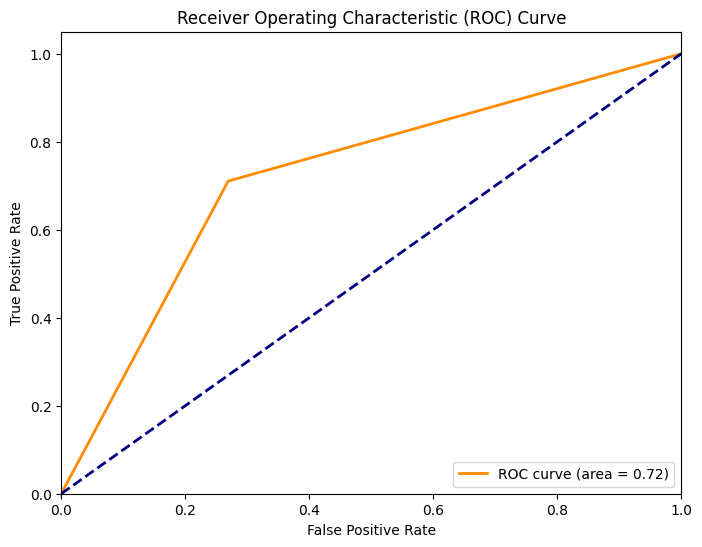

In [53]:
# Plot the ROC curve by giving appropriate names for title and axes.

### WRITE CODE HERE

from sklearn.metrics import roc_curve, auc
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

y_pred_proba = dt.predict_proba(X_val)[:, 1]

# Calculate ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)

# Calculate AUC
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Q. Based on the scores for training set and validation set, explain the performance of the above model in terms of bias and variance.<br>

Ans - Based on the accuracy, precision and recall scores for the training set and validations sets respectively, the bias of the model is extremely low as it fits the training data perfectly but the variance is quite high as the model doesn't perform as well on the validation data. This is because the decision tree also fits the noise in the training set, due to which it overfits on the training set and its dependence is highly dependent on the training set. However, due to the high variance, it does not generalize too well on the test set.

### Random Forest


Decision Trees have low predictive power compared to other methods due to high variance. Random Forest increases prediction power at the expense of decreased interpretability.


From sklearn.ensemble use RandomForestClassifier to build a classification model with default parameters.

In [54]:
from sklearn.ensemble import RandomForestClassifier
### Fit the classifier on the training data
# Please set random_state=30
### WRITE CODE HERE ###
rf_model = RandomForestClassifier(random_state=30)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=30)

In [55]:
### Make predictions on the training data
### WRITE CODE HERE ###

y_pred_train = rf_model.predict(X_train)

Print accuracy, precision and recall for the predictions made on the training data.

In [56]:
accuracy_train = my_accuracy(y_train, y_pred_train)
precision_train = my_precision(y_train, y_pred_train)
recall_train = my_recall(y_train, y_pred_train)

print(f'Accuracy on training data: {accuracy_train : .2f}')
print(f'Precision on training data: {precision_train : .2f}')
print(f'Recall on training data: {recall_train : .2f}')

Accuracy on training data:  1.00
Precision on training data:  1.00
Recall on training data:  1.00


In [57]:
### Make predictions on the validation data

### WRITE CODE HERE ###

y_pred_val = rf_model.predict(X_val)

Print accuracy, prediction and recall for the predictions made on the validation data.

In [58]:
### WRITE CODE HERE ###

accuracy_val = my_accuracy(y_val, y_pred_val)
precision_val = my_precision(y_val, y_pred_val)
recall_val = my_recall(y_val, y_pred_val)

print(f'Accuracy on validation data: {accuracy_val : .2f}')
print(f'Precision on validation data: {precision_val : .2f}')
print(f'Recall on validation data: {recall_val : .2f}')

Accuracy on validation data:  0.81
Precision on validation data:  0.74
Recall on validation data:  0.84


Plot ROC curve and obtain AUC for the validation predictions

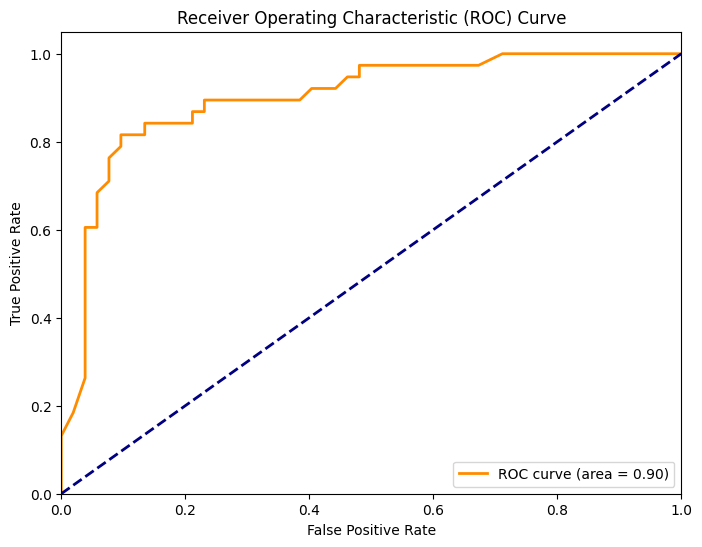

In [59]:
# Plot the ROC curve by giving appropriate names for title and axes.

### WRITE CODE HERE

from sklearn.metrics import roc_curve, auc
import sklearn.metrics as metrics

y_pred_proba = rf_model.predict_proba(X_val)[:, 1]

# Calculate ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)

# Calculate AUC
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Q. Based on the scores for training set and validation set, explain the performance of the above model in terms of bias and variance. Is the Random Forest model better or worse than the Decision Tree model? Explain why you think the performance may have improved or deteriorated.

Ans- Based on the accuracy, precision and recall scores for the training set and validations sets respectively, the bias of the model is extremely low similar to the decision tree and it also has relatively lower variance as it performs better on the validation set as well compared to the decision tree.

Overall the model performance of the random forest model is better than that of the decision tree model due to the following reasons:<br/>
1 - Random forest is an ensemble model so it aggregates the predictions from multiple trees. The aggregation leads to a much stronger learner than any of the individual learners. <br/>
2 - Bootstrapping of the training set with replacement leads to the generation of a new set of training examples, which is like picking independent samples from the population. This reduces the overall varianceof the model and it generalizes better to unseen datasets from the same population.<br/>
3 - The random forest model only picks a random subset of all the features for each split in a tree (by default the square root of the total number of features). This prevents the model from splitting on the same set of features across different trees due to the greedy nature of the algorithm, and causes the model to pick splits that it may not have picked if all features were available for all splits, which can lead to more optimal splits later on.

## Hyperparameters

"Model tuning" refers to model adjustments to better fit the data, which is separate from "fitting" or "training" the model.

There are aspects of some models that are user specified. For example, when using a random forest (which is basically an ensemble of decision trees), it is probably a good idea to choose the right number of underlying trees. Too many and the model might overfit, and too few and the model might not be able to properly learn the data. Parameters such as these are referred to as "hyperparameters" or "free parameters", as the values for these are determined by the user and not the algorithm.

A quick and efficient way to optimize hyperparameters is to perform Grid Search over different values of the parameters.

In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
param_grid = {
    'max_depth': [1, 3, 6, 9, None],
    'max_features': ['sqrt', 'log2', None, 0.5],
    'min_samples_leaf': [1, 2, 4, 8],
    'min_samples_split': [2, 4, 10],
    'n_estimators': [25, 100, 200]
}

In [62]:
rf = RandomForestClassifier(random_state=30)

In [63]:
grid_search = GridSearchCV(estimator = rf, scoring='recall', param_grid = param_grid,
                          cv = 3, n_jobs = -1, verbose = 2)

In [64]:
### Fit on the training data with all sets of parameters.
### WRITE CODE HERE ###

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 720 candidates, totalling 2160 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=30), n_jobs=-1,
             param_grid={'max_depth': [1, 3, 6, 9, None],
                         'max_features': ['sqrt', 'log2', None, 0.5],
                         'min_samples_leaf': [1, 2, 4, 8],
                         'min_samples_split': [2, 4, 10],
                         'n_estimators': [25, 100, 200]},
             scoring='recall', verbose=2)

Display the parameters of the best model.

In [65]:
# Print the best parameters
### WRITE CODE HERE ###
grid_search.best_params_

{'max_depth': 6,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 25}

In [66]:
# Print the best score
grid_search.best_score_

0.8282828282828283

In [68]:
### Using the best model, do the following:
### Make predictions on the training set and display accuracy, precision and recall.
### Make predictions on the validation set and display accuracy, precision and recall.
rf_best = RandomForestClassifier(max_depth=6,
                                 max_features='sqrt',
                                 min_samples_leaf=4,
                                 min_samples_split=2,
                                 n_estimators=25,
                                 random_state = 30)
rf_best.fit(X_train, y_train)

### Using the best model, do the following:
### Make predictions on the training set and display accuracy, precision and recall.
### WRITE CODE HERE ###
y_pred_train = rf_best.predict(X_train)
accuracy_train = my_accuracy(y_train, y_pred_train)
precision_train = my_precision(y_train, y_pred_train)
recall_train = my_recall(y_train, y_pred_train)

print(f'Accuracy on training data: {accuracy_train : .2f}')
print(f'Precision on training data: {precision_train : .2f}')
print(f'Recall on training data: {recall_train : .2f}')

### Make predictions on the validation set and display accuracy, precision and recall.
### WRITE CODE HERE ###
y_pred_val = rf_best.predict(X_val)
accuracy_val = my_accuracy(y_val, y_pred_val)
precision_val = my_precision(y_val, y_pred_val)
recall_val = my_recall(y_val, y_pred_val)

print(f'Accuracy on validation data: {accuracy_val : .2f}')
print(f'Precision on validation data: {precision_val : .2f}')
print(f'Recall on validation data: {recall_val : .2f}')

Accuracy on training data:  0.91
Precision on training data:  0.94
Recall on training data:  0.88
Accuracy on validation data:  0.84
Precision on validation data:  0.79
Recall on validation data:  0.87


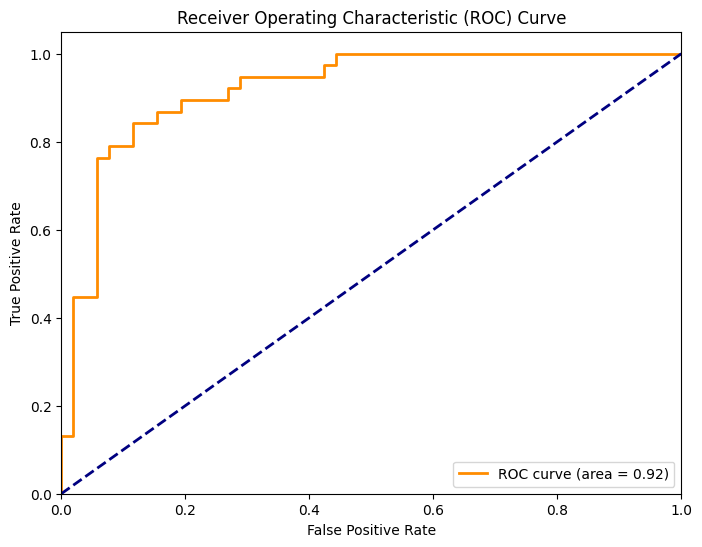

In [69]:
# Plot the ROC curve on validation set by giving appropriate names for title and axes.

### WRITE CODE HERE
y_pred_proba = rf_best.predict_proba(X_val)[:, 1]

# Calculate ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)

# Calculate AUC
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()